#IMPORTING DATA

In [2]:
# importing dataset
import pandas as pd

df = pd.read_csv(r'/content/dataset1 (1).csv')
df = df.drop(['Unnamed: 0'], axis = 1)
df.shape


(10000, 2)

In [3]:
# changing column names and checking null values
df = df.rename(columns={'Emotion': 'label', 'Text': 'text'})
df.isnull().sum()

label    0
text     0
dtype: int64

happy       2000
anger       2000
sadness     2000
fear        2000
surprise    2000
Name: label, dtype: int64


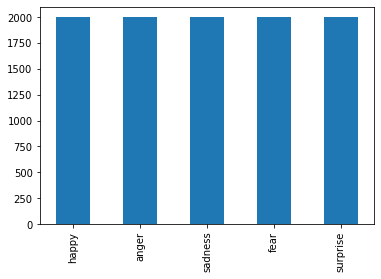

In [4]:
# checking each label count
print(df['label'].value_counts())
df['label'].value_counts().plot(kind='bar')

In [5]:
# giving each emotion a label
label_map = {'happy': 0,
             'anger': 1,
             'sadness': 2,
             'fear':3,
             'surprise':4}

# changing the text labels into each number
df['label'] = df['label'].map(label_map)
df.head()

,label,text
0,0,i have been with petronas for years i feel tha...
1,0,i do feel that running is a divine experience ...
2,0,i have immense sympathy with the general point...
3,0,i do not feel reassured anxiety is on each side
4,0,i have the feeling she was amused and delighted


##Split dataset

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(df['text'], df['label'].values, test_size=0.15, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.17647, random_state=1)

#PREPROCESSING

In [7]:
# importing necessary tools for preprocessing
import string
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize
import re

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


Functions for preprocessing

In [8]:
# converting text in lower case
def convert_to_lower(text):
    return text.lower()

# removing numbers and numeric values
def remove_numbers(text):
    number_pattern = r'\d+'
    without_number = re.sub(pattern=number_pattern, repl=" ", string=text)
    return without_number

# removing punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

# removing stop words
def remove_stopwords(text):
    removed = []
    stop_words = list(stopwords.words("english"))
    tokens = word_tokenize(text)
    for i in range(len(tokens)):
        if tokens[i] not in stop_words:
            removed.append(tokens[i])
    return " ".join(removed)

# remove extra white spaces
def remove_extra_white_spaces(text):
    single_char_pattern = r'\s+[a-zA-Z]\s+'
    without_sc = re.sub(pattern=single_char_pattern, repl=" ", string=text)
    return without_sc

# lemmatizing
def lemmatizing(text):
    lemmatizer = WordNetLemmatizer()
    tokens = word_tokenize(text)
    for i in range(len(tokens)):
        lemma_word = lemmatizer.lemmatize(tokens[i])
        tokens[i] = lemma_word
    return " ".join(tokens)

In [9]:
# Apply preprocessing functions
X_train = X_train.apply(lambda x: convert_to_lower(x))
X_val = X_val.apply(lambda x: convert_to_lower(x))
X_test = X_test.apply(lambda x: convert_to_lower(x))

X_train = X_train.apply(lambda x: remove_numbers(x))
X_val = X_val.apply(lambda x: remove_numbers(x))
X_test = X_test.apply(lambda x: remove_numbers(x))

X_train = X_train.apply(lambda x: remove_punctuation(x))
X_val = X_val.apply(lambda x: remove_punctuation(x))
X_test = X_test.apply(lambda x: remove_punctuation(x))

X_train = X_train.apply(lambda x: remove_stopwords(x))
X_val = X_val.apply(lambda x: remove_stopwords(x))
X_test = X_test.apply(lambda x: remove_stopwords(x))

X_train = X_train.apply(lambda x: remove_extra_white_spaces(x))
X_val = X_val.apply(lambda x: remove_extra_white_spaces(x))
X_test = X_test.apply(lambda x: remove_extra_white_spaces(x))

X_train = X_train.apply(lambda x: lemmatizing(x))
X_val = X_val.apply(lambda x: lemmatizing(x))
X_test = X_test.apply(lambda x: lemmatizing(x))

In [10]:
import numpy as np

seq_len = 512
train_samples = len(X_train)
val_samples =len(X_val)
test_samples =len(X_test)

print(train_samples, seq_len)
print(val_samples, seq_len)
print(test_samples, seq_len)

7000 512
1500 512
1500 512


In [11]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.9 MB 5.1 MB/s 
     |████████████████████████████████| 120 kB 59.4 MB/s 
     |████████████████████████████████| 6.6 MB 51.0 MB/s 


In [12]:
from transformers import BertTokenizer

# initialize tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-cased')

Downloading:   0%|          | 0.00/213k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [13]:
# tokenize - this time returning Numpy tensors
tokens_train = tokenizer(X_train.tolist(), max_length=seq_len, truncation=True,
                   padding='max_length', add_special_tokens=True,
                   return_tensors='np')
tokens_val =tokenizer(X_val.tolist(), max_length=seq_len, truncation=True,
                   padding='max_length', add_special_tokens=True,
                   return_tensors='np')
tokens_test =tokenizer(X_test.tolist(), max_length=seq_len, truncation=True,
                   padding='max_length', add_special_tokens=True,
                   return_tensors='np')

In [14]:
print(tokens_train.keys())
print(tokens_val.keys())
print(tokens_test.keys())

dict_keys(['input_ids', 'token_type_ids', 'attention_mask'])
dict_keys(['input_ids', 'token_type_ids', 'attention_mask'])
dict_keys(['input_ids', 'token_type_ids', 'attention_mask'])


In [15]:
with open('train-xids.npy', 'wb') as f:
    np.save(f, tokens_train['input_ids'])
with open('train-xmask.npy', 'wb') as f:
    np.save(f, tokens_train['attention_mask'])
with open('val-xids.npy', 'wb') as f:
    np.save(f, tokens_val['input_ids'])
with open('val-xmask.npy', 'wb') as f:
    np.save(f, tokens_val['attention_mask'])
with open('test-xids.npy', 'wb') as f:
    np.save(f, tokens_test['input_ids'])
with open('test-xmask.npy', 'wb') as f:
    np.save(f, tokens_test['attention_mask'])

In [16]:
del tokens_train
del tokens_val
del tokens_test

In [17]:
# we then initialize the zero array
labels_train = np.zeros((train_samples, y_train.max()+1))
labels_val = np.zeros((val_samples, y_val.max()+1))
labels_test = np.zeros((test_samples, y_test.max()+1))

print(labels_train.shape)
print(labels_val.shape)
print(labels_test.shape)

(7000, 5)
(1500, 5)
(1500, 5)


In [18]:
labels_train[np.arange(train_samples), y_train] = 1
labels_val[np.arange(val_samples), y_val] = 1
labels_test[np.arange(test_samples), y_test] = 1

print(labels_train)
print(labels_val)
print(labels_test)

[[0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 ...
 [1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]]
[[0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 ...
 [0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]]
[[0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 ...
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]]


In [19]:
with open('train-labels.npy', 'wb') as f:
    np.save(f, labels_train)
with open('val-labels.npy', 'wb') as f:
    np.save(f, labels_val)
with open('test-labels.npy', 'wb') as f:
    np.save(f, labels_test)   

#ML MODEL

In [24]:
print('Train shape: ', X_train.shape, y_train.shape)
print('Val shape: ', X_val.shape, y_val.shape)
print('Test shape: ', X_test.shape, y_test.shape)

Train shape:  (7000,) (7000,)
Val shape:  (1500,) (1500,)
Test shape:  (1500,) (1500,)


In [20]:
with open('train-xids.npy', 'rb') as f:
    Xids_train = np.load(f, allow_pickle=True)
with open('train-xmask.npy', 'rb') as f:
    Xmask_train = np.load(f, allow_pickle=True)
with open('train-labels.npy', 'rb') as f:
    labels_train = np.load(f, allow_pickle=True)

with open('val-xids.npy', 'rb') as f:
    Xids_val = np.load(f, allow_pickle=True)
with open('val-xmask.npy', 'rb') as f:
    Xmask_val = np.load(f, allow_pickle=True)
with open('val-labels.npy', 'rb') as f:
    labels_val = np.load(f, allow_pickle=True)

In [21]:
import tensorflow as tf

dataset_train = tf.data.Dataset.from_tensor_slices((Xids_train, Xmask_train, labels_train))
dataset_val = tf.data.Dataset.from_tensor_slices((Xids_val, Xmask_val, labels_val))

print(dataset_train.take(1))
print(dataset_val.take(1))

<TakeDataset element_spec=(TensorSpec(shape=(512,), dtype=tf.int64, name=None), TensorSpec(shape=(512,), dtype=tf.int64, name=None), TensorSpec(shape=(5,), dtype=tf.float64, name=None))>
<TakeDataset element_spec=(TensorSpec(shape=(512,), dtype=tf.int64, name=None), TensorSpec(shape=(512,), dtype=tf.int64, name=None), TensorSpec(shape=(5,), dtype=tf.float64, name=None))>


In [22]:
def map_func(input_ids, masks, labels):
    # we convert our three-item tuple into a two-item tuple where the input item is a dictionary
    return {'input_ids': input_ids, 'attention_mask': masks}, labels

# then we use the dataset map method to apply this transformation
dataset_train = dataset_train.map(map_func)
dataset_val = dataset_val.map(map_func)

print(dataset_train.take(1))
print(dataset_val.take(1))

<TakeDataset element_spec=({'input_ids': TensorSpec(shape=(512,), dtype=tf.int64, name=None), 'attention_mask': TensorSpec(shape=(512,), dtype=tf.int64, name=None)}, TensorSpec(shape=(5,), dtype=tf.float64, name=None))>
<TakeDataset element_spec=({'input_ids': TensorSpec(shape=(512,), dtype=tf.int64, name=None), 'attention_mask': TensorSpec(shape=(512,), dtype=tf.int64, name=None)}, TensorSpec(shape=(5,), dtype=tf.float64, name=None))>


In [23]:
batch_size = 16

dataset_train = dataset_train.shuffle(10000).batch(batch_size, drop_remainder=True)
dataset_val = dataset_val.shuffle(10000).batch(batch_size, drop_remainder=True)

print(dataset_train.take(1))
print(dataset_val.take(1))

<TakeDataset element_spec=({'input_ids': TensorSpec(shape=(16, 512), dtype=tf.int64, name=None), 'attention_mask': TensorSpec(shape=(16, 512), dtype=tf.int64, name=None)}, TensorSpec(shape=(16, 5), dtype=tf.float64, name=None))>
<TakeDataset element_spec=({'input_ids': TensorSpec(shape=(16, 512), dtype=tf.int64, name=None), 'attention_mask': TensorSpec(shape=(16, 512), dtype=tf.int64, name=None)}, TensorSpec(shape=(16, 5), dtype=tf.float64, name=None))>


In [24]:
train_ds = dataset_train
val_ds = dataset_val

# free up memory
del dataset_train
del dataset_val

In [25]:
tf.data.experimental.save(train_ds, 'train')
tf.data.experimental.save(val_ds, 'val')

In [26]:
train_ds.element_spec

({'input_ids': TensorSpec(shape=(16, 512), dtype=tf.int64, name=None),
  'attention_mask': TensorSpec(shape=(16, 512), dtype=tf.int64, name=None)},
 TensorSpec(shape=(16, 5), dtype=tf.float64, name=None))

In [27]:
val_ds.element_spec == train_ds.element_spec

True

In [28]:
ds = tf.data.experimental.load('train', element_spec=train_ds.element_spec)

#Build and train

In [29]:
from transformers import TFAutoModel

bert = TFAutoModel.from_pretrained('bert-base-cased')

# we can view the model using the summary method
bert.summary()

Downloading:   0%|          | 0.00/527M [00:00<?, ?B/s]

Some layers from the model checkpoint at bert-base-cased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-cased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


Model: "tf_bert_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bert (TFBertMainLayer)      multiple                  108310272 
                                                                 
Total params: 108,310,272
Trainable params: 108,310,272
Non-trainable params: 0
_________________________________________________________________


In [30]:
import tensorflow as tf

# two input layers, we ensure layer name variables match to dictionary keys in TF dataset
input_ids = tf.keras.layers.Input(shape=(512,), name='input_ids', dtype='int32')
mask = tf.keras.layers.Input(shape=(512,), name='attention_mask', dtype='int32')

# we access the transformer model within our bert object using the bert attribute (eg bert.bert instead of bert)
embeddings = bert.bert(input_ids, attention_mask=mask)[1]  # access final activations (alread max-pooled) [1]
# convert bert embeddings into 5 output classes
x = tf.keras.layers.Dense(1024, activation='relu')(embeddings)
y = tf.keras.layers.Dense(5, activation='softmax', name='outputs')(x)

In [31]:
# initialize model
model = tf.keras.Model(inputs=[input_ids, mask], outputs=y)

# (optional) freeze bert layer
#model.layers[2].trainable = False

# print out model summary
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ids (InputLayer)         [(None, 512)]        0           []                               
                                                                                                  
 attention_mask (InputLayer)    [(None, 512)]        0           []                               
                                                                                                  
 bert (TFBertMainLayer)         TFBaseModelOutputWi  108310272   ['input_ids[0][0]',              
                                thPoolingAndCrossAt               'attention_mask[0][0]']         
                                tentions(last_hidde                                               
                                n_state=(None, 512,                                           

In [32]:
!pip install tensorflow_addons
import tensorflow_addons as tfa

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 5.0 MB/s 


In [33]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-5, decay=1e-6)
loss = tf.keras.losses.CategoricalCrossentropy()
acc = tf.keras.metrics.CategoricalAccuracy('accuracy')
f1_score = tfa.metrics.F1Score(num_classes=5)

model.compile(optimizer=optimizer, loss=loss, metrics=[acc, f1_score])

In [35]:
element_spec = ({'input_ids': tf.TensorSpec(shape=(16, 512),  dtype= tf.int64, name=None),
              'attention_mask': tf.TensorSpec(shape=(16, 512), dtype= tf.int64, name=None)},
                tf.TensorSpec(shape=(16, 5), dtype=tf.float64, name=None))

# load the training and validation sets
train_ds = tf.data.experimental.load('train', element_spec=element_spec)
val_ds = tf.data.experimental.load('val', element_spec=element_spec)

# view the input format
train_ds.take(1)

<TakeDataset element_spec=({'input_ids': TensorSpec(shape=(16, 512), dtype=tf.int64, name=None), 'attention_mask': TensorSpec(shape=(16, 512), dtype=tf.int64, name=None)}, TensorSpec(shape=(16, 5), dtype=tf.float64, name=None))>

In [36]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=2
)

Epoch 1/2
437/437 [==============================] - 7293s 17s/step - loss: 0.7370 - accuracy: 0.6841 - f1_score: 0.6846 - val_loss: 0.3973 - val_accuracy: 0.8360 - val_f1_score: 0.8316
Epoch 2/2
437/437 [==============================] - 7323s 17s/step - loss: 0.3167 - accuracy: 0.8750 - f1_score: 0.8765 - val_loss: 0.2917 - val_accuracy: 0.8723 - val_f1_score: 0.8688


In [37]:
model.save('sentiment_model')

In [40]:
from google.colab import files
!zip -r /content/sentiment_model.zip /content/sentiment_model
files.download('sentiment_model.zip')

  adding: content/sentiment_model/ (stored 0%)
  adding: content/sentiment_model/keras_metadata.pb (deflated 95%)
  adding: content/sentiment_model/variables/ (stored 0%)
  adding: content/sentiment_model/variables/variables.data-00000-of-00001 (deflated 18%)
  adding: content/sentiment_model/variables/variables.index (deflated 80%)
  adding: content/sentiment_model/saved_model.pb (deflated 92%)
  adding: content/sentiment_model/assets/ (stored 0%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Load and predict

In [41]:
import tensorflow as tf

model = tf.keras.models.load_model('sentiment_model')

# view model architecture to confirm we have save and loaded correctly
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ids (InputLayer)         [(None, 512)]        0           []                               
                                                                                                  
 attention_mask (InputLayer)    [(None, 512)]        0           []                               
                                                                                                  
 bert (TFBertMainLayer)         TFBaseModelOutputWi  108310272   ['input_ids[0][0]',              
                                thPoolingAndCrossAt               'attention_mask[0][0]']         
                                tentions(last_hidde                                               
                                n_state=(None, 512,                                           

In [ ]:
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained('bert-base-cased')

tokens = {'input_ids': tf.cast(tokens['input_ids'], tf.float64),
            'attention_mask': tf.cast(tokens['attention_mask'], tf.float64)}

def prep_data(text):
    tokens = tokenizer.encode_plus(text, max_length=512,
                                   truncation=True, padding='max_length',
                                   add_special_tokens=True, return_token_type_ids=False,
                                   return_tensors='tf')
    # tokenizer returns int32 tensors, we need to return float64, so we use tf.cast
    return {'input_ids': tf.cast(tokens['input_ids'], tf.float64),
            'attention_mask': tf.cast(tokens['attention_mask'], tf.float64)}

In [52]:
with open('test-xids.npy', 'rb') as f:
    Xids_test = np.load(f, allow_pickle=True)
with open('test-xmask.npy', 'rb') as f:
    Xmask_test = np.load(f, allow_pickle=True)
with open('test-labels.npy', 'rb') as f:
    labels_test = np.load(f, allow_pickle=True)

In [53]:
dataset_test = tf.data.Dataset.from_tensor_slices((Xids_test, Xmask_test))
print(dataset_test.take(1))

<TakeDataset element_spec=(TensorSpec(shape=(512,), dtype=tf.int64, name=None), TensorSpec(shape=(512,), dtype=tf.int64, name=None))>


In [54]:
def map_func(input_ids, masks):
    return {'input_ids': input_ids, 'attention_mask': masks}

# then we use the dataset map method to apply this transformation
dataset_test = dataset_test.map(map_func)
print(dataset_test.take(1))

<TakeDataset element_spec={'input_ids': TensorSpec(shape=(512,), dtype=tf.int64, name=None), 'attention_mask': TensorSpec(shape=(512,), dtype=tf.int64, name=None)}>


In [56]:
batch_size = 16

dataset_test = dataset_test.shuffle(10000).batch(batch_size, drop_remainder=True)
print(dataset_test.take(1))

<TakeDataset element_spec={'input_ids': TensorSpec(shape=(16, 512), dtype=tf.int64, name=None), 'attention_mask': TensorSpec(shape=(16, 512), dtype=tf.int64, name=None)}>


In [ ]:
df['label'] = None

for i, row in df.iterrows():
    # get token tensors
    tokens = dataset_test
    #tokens = prep_data(row['tweet'])
    # get probabilities
    probs = model.predict(tokens)
    # find argmax for winning class
    pred = np.argmax(probs)
    # add to dataframe
    df.at[i, 'label'] = pred

df.head()

#posibles utilidades

In [ ]:
X_train 
X_val
X_test
y_train
y_val 
y_test

In [ ]:
# Apply preprocessing functions
df['text'] = df['text'].apply(lambda x: convert_to_lower(x))
df['text'] = df['text'].apply(lambda x: remove_numbers(x))
df['text'] = df['text'].apply(lambda x: remove_punctuation(x))
df['text'] = df['text'].apply(lambda x: remove_punctuation(x))
df['text'] = df['text'].apply(lambda x: remove_extra_white_spaces(x))
df['text'] = df['text'].apply(lambda x: lemmatizing(x))

In [ ]:
# adding column of text length after cleaning/preprocessing
df['length_after_cleaning'] = df['text'].apply(lambda x: len(x))
df.head()

,label,text,length,length_after_cleaning
0,anger,what ’ wrong with that cigarette is the thing ...,68,58
1,anger,getting worse now he ’ eating me out of house ...,315,288
2,anger,no the steak wa recommended but it is not very...,61,52
3,anger,so what it is not fresh and im not happy about it,56,49
4,anger,no thank you,18,12


Text vectorization

In [ ]:
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer

# initialize the method and apply to the text column to transform it into a matrix
tf_wb = TfidfVectorizer()
X_train = tf_wb.fit_transform(X_train)
X_val = tf_wb.fit_transform(X_val)
X_test = tf_wb.fit_transform(X_test)

# convert the matrix into an array
import numpy as np
X_train = X_train.toarray()
X_val = X_val.toarray()
X_test = X_test.toarray()

split original dataset into two smaller ones

In [ ]:
grouped = df.groupby(df.label)
df_happy = grouped.get_group("happy")
df_anger = grouped.get_group("anger")
df_sadness = grouped.get_group("sadness")
df_fear = grouped.get_group("fear")
df_surprise = grouped.get_group("surprise")

In [ ]:
df_happy1 = df_happy.iloc[:2000,:]
df_anger1 = df_anger.iloc[:2000,:]
df_sadness1 = df_sadness.iloc[:2000,:]
df_fear1 = df_fear.iloc[:2000,:]
df_surprise1 = df_surprise.iloc[:2000,:]
print("Shape of new dataframes 1 - {}, {}, {}, {}, {}".format(df_happy1.shape, df_anger1.shape, df_sadness1.shape, df_fear1.shape, df_surprise1.shape))

df_happy2 = df_happy.iloc[2000:,:]
df_anger2 = df_anger.iloc[2000:,:]
df_sadness2 = df_sadness.iloc[2000:,:]
df_fear2 = df_fear.iloc[2000:,:]
df_surprise2 = df_surprise.iloc[2000:,:]
print("Shape of new dataframes 2 - {}, {}, {}, {}, {}".format(df_happy2.shape, df_anger2.shape, df_sadness2.shape, df_fear2.shape, df_surprise2.shape))

Shape of new dataframes 1 - (2000, 2), (2000, 2), (2000, 2), (2000, 2), (2000, 2)
Shape of new dataframes 2 - (3700, 2), (3700, 2), (3700, 2), (3700, 2), (3700, 2)


In [ ]:
dataset1 = pd.concat([df_happy1, df_anger1, df_sadness1, df_fear1, df_surprise1], axis=0)
dataset2 = pd.concat([df_happy2, df_anger2, df_sadness2, df_fear2, df_surprise2], axis=0)

happy       2000
anger       2000
sadness     2000
fear        2000
surprise    2000
Name: label, dtype: int64


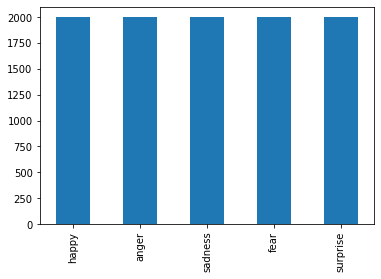

In [ ]:
print(dataset1['label'].value_counts())
dataset1['label'].value_counts().plot(kind='bar')

happy       3700
anger       3700
sadness     3700
fear        3700
surprise    3700
Name: label, dtype: int64


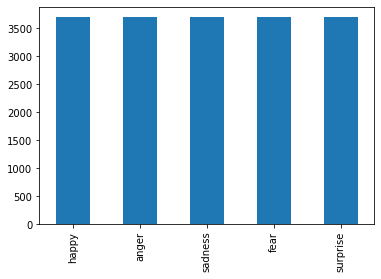

In [ ]:
print(dataset2['label'].value_counts())
dataset2['label'].value_counts().plot(kind='bar')

In [ ]:
dataset1.to_csv('/content/dataset1.csv')
dataset2.to_csv('/content/dataset2.csv')